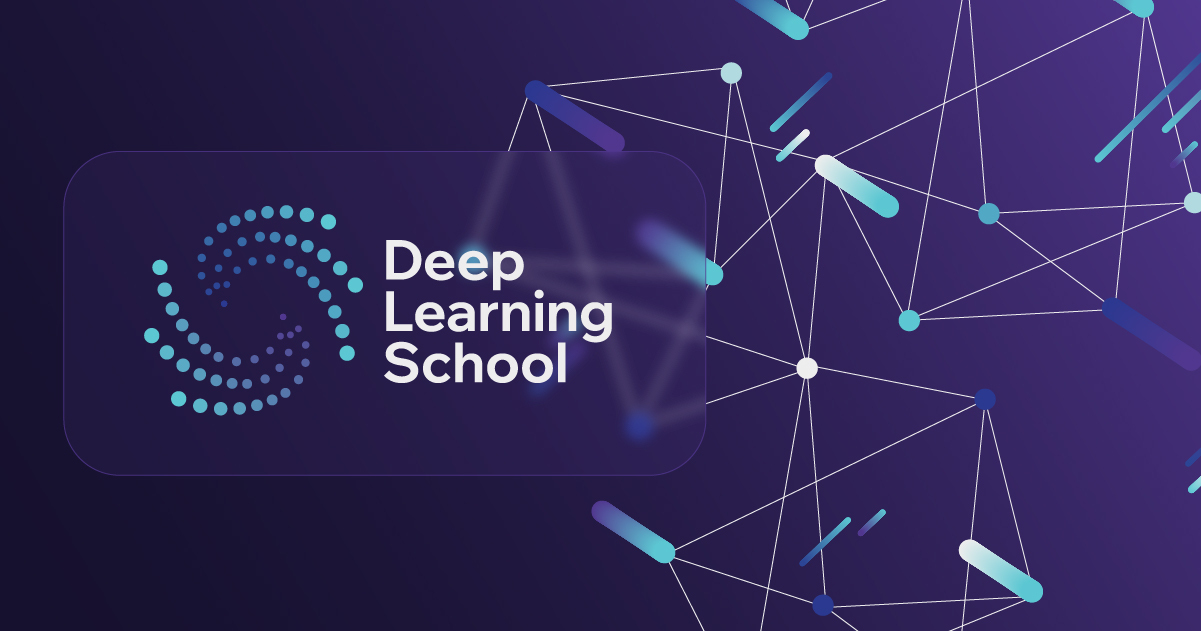

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Решение конкурса на kaggle</b></h1>



Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /home/mafioznic/Документы/DeepLearning/week_03_composition_model_selection/Homework/train.csv
100%|████████████████████████████████████████| 664k/664k [00:00<00:00, 1.45MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /home/mafioznic/Документы/DeepLearning/week_03_composition_model_selection/Homework/test.csv
100%|█████████████████████████████████████████| 218k/218k [00:00<00:00, 615kB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /home/mafioznic/Документы/DeepLearning/week_03_composition_model_selection/Homework/submission.csv
100%|███████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 688kB/s]


In [2]:
data = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
data_subm = pd.read_csv('./submission.csv')


In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

bin_cols = [
    'Sex',
    'IsSeniorCitizen', #- не требует обработки
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [4]:
for num_col in num_cols:
    print(num_col, data[num_col].unique())

# в столбце TotalSpent есть пропуски в виде пробелов (" ")

def drop_nan(data):
    data['TotalSpent'] = data['TotalSpent'].replace(' ', 'nan')
    data['TotalSpent'] = data['TotalSpent'].astype(float)

    # Вычисляем среднее значение столбца
    mean_value = data['TotalSpent'].mean()

    # Заменяем NaN на среднее значение
    data['TotalSpent'].fillna(mean_value, inplace=True)

drop_nan(data)
drop_nan(data_test)
data.isna().sum()

ClientPeriod [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0]
MonthlySpending [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ]
TotalSpent ['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']


/tmp/ipykernel_3493/3260936337.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalSpent'].fillna(mean_value, inplace=True)
/tmp/ipykernel_3493/3260936337.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Сделаем копию данных с необработанными категориальными признаками и не нормированными данными, чтобы в конце загрузить ее в бустер

In [5]:
cat_data = data.copy()
cat_data_test = data_test.copy()

In [6]:
def bin_transform(data):
    for col in bin_cols:
        if col != 'IsSeniorCitizen':
            data[col] = data[col].map({'Yes': 1, 'No': 0, 'Male' : 1, 'Female' : 0})

bin_transform(data)
bin_transform(data_test)

data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,0
1,72,25.85,1872.20,1,0,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),0
2,1,75.90,75.90,1,0,0,0,1,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,1,Electronic check,1
3,32,79.30,2570.00,0,1,1,0,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,0,0,1,1,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,0,Electronic check,0
5278,50,44.45,2188.45,1,0,1,0,0,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,1,Bank transfer (automatic),0
5279,1,55.05,55.05,1,0,0,0,1,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,0,Mailed check,0
5280,29,76.00,2215.25,0,0,0,0,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Credit card (automatic),0


In [7]:
for cat_col in cat_cols:
    print(cat_col, data[cat_col].unique())

HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Инициализация OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse_output=False для получения массива вместо sparse matrix

# Обучаем One-Hot Encoding на категориальных столбцам
encoder.fit(data[cat_cols])

def cat_transform(data):
    # Применяем One-Hot Encoding к категориальным столбцам
    encoded_data = encoder.transform(data[cat_cols])

    # Преобразуем результат в DataFrame
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

    # Объединяем закодированные данные с исходным DataFrame (если нужно)
    df_encoded = pd.concat([data.drop(columns=cat_cols), encoded_df], axis=1)

    return df_encoded

data = cat_transform(data)
data_test = cat_transform(data_test)

data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,Churn,...,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,1,0,0,0,1,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,0,1,1,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0,1,1,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,1,0,1,0,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,1,0,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0,0,0,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Для численных признаков построим гистограммы и boxplot.

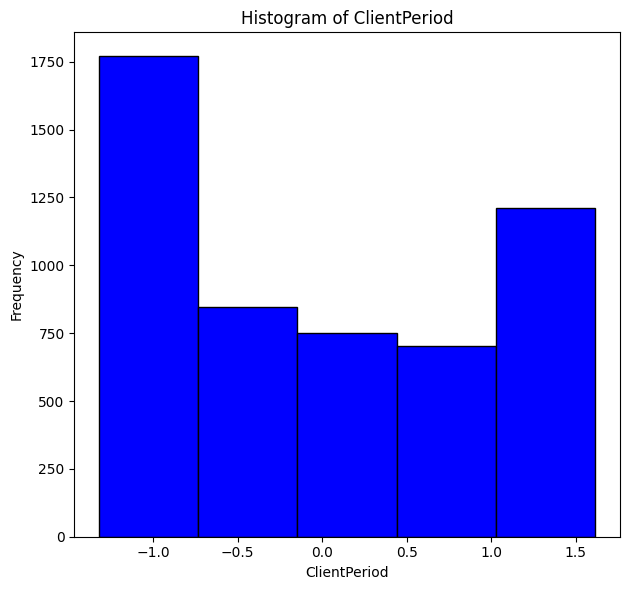

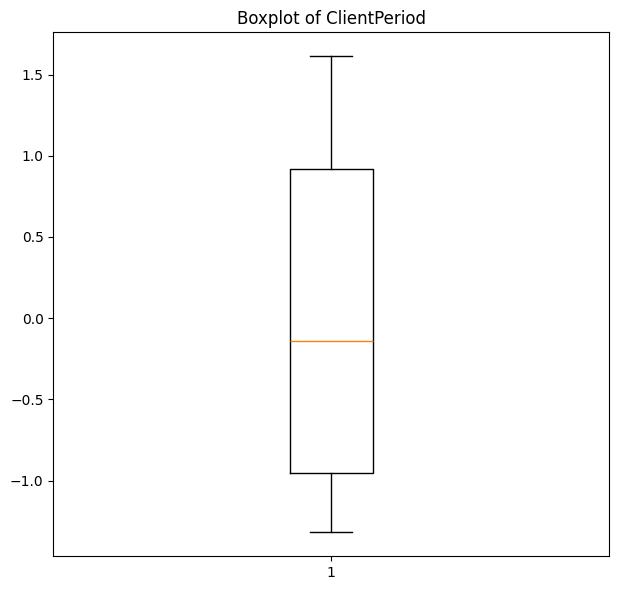

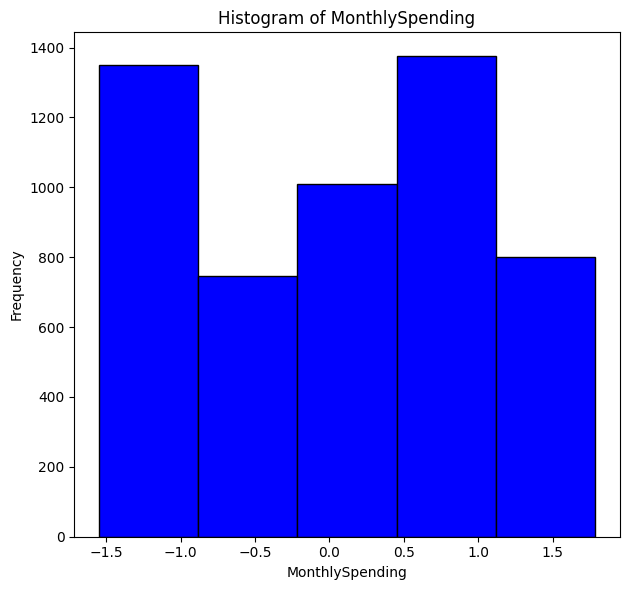

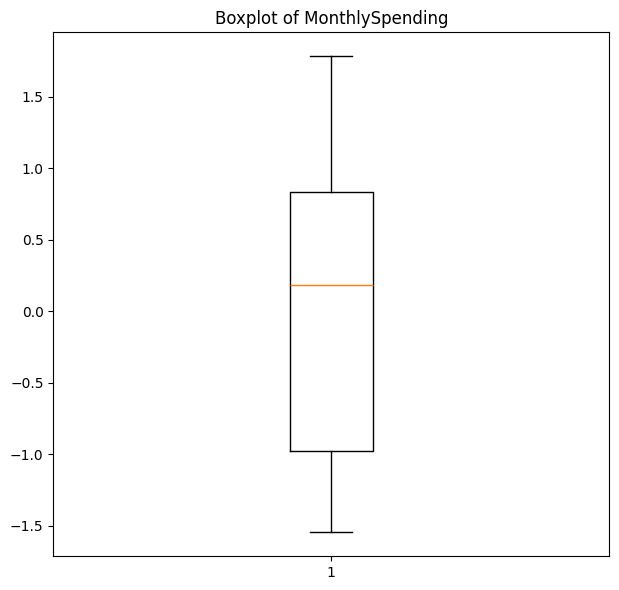

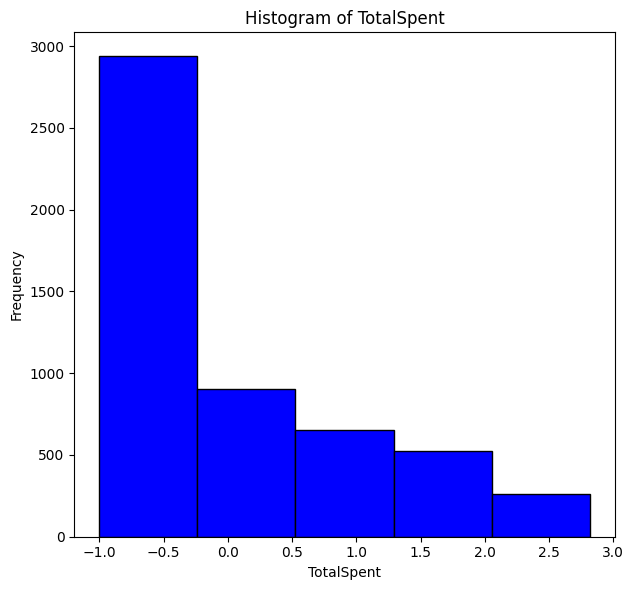

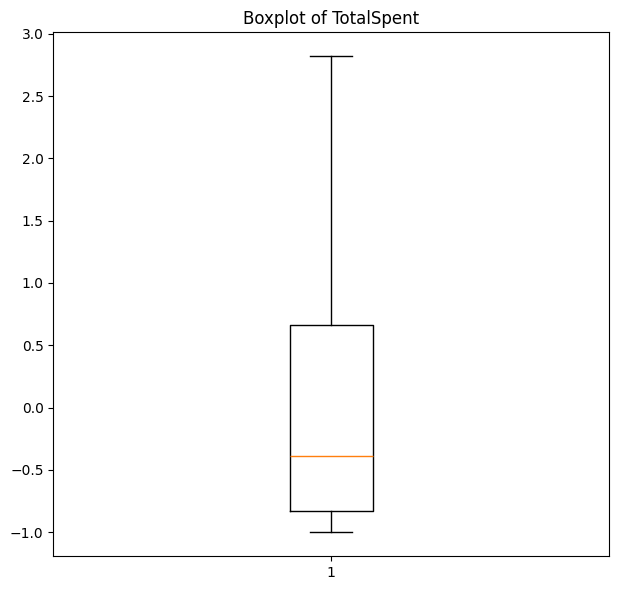

In [15]:
for num in num_cols:
    # Гистограммы для численных признаков
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(data[num], bins=5, color='blue', edgecolor='black')
    plt.title(f'Histogram of {num}')
    plt.xlabel(num)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Boxplot для численных признаков
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(data[num])
    plt.title(f'Boxplot of {num}')

    plt.tight_layout()
    plt.show()

Анализ категориальных признаков 

Для категориальных признаков посчитаем количество каждого значения и построим bar-диаграммы и круговые диаграммы.

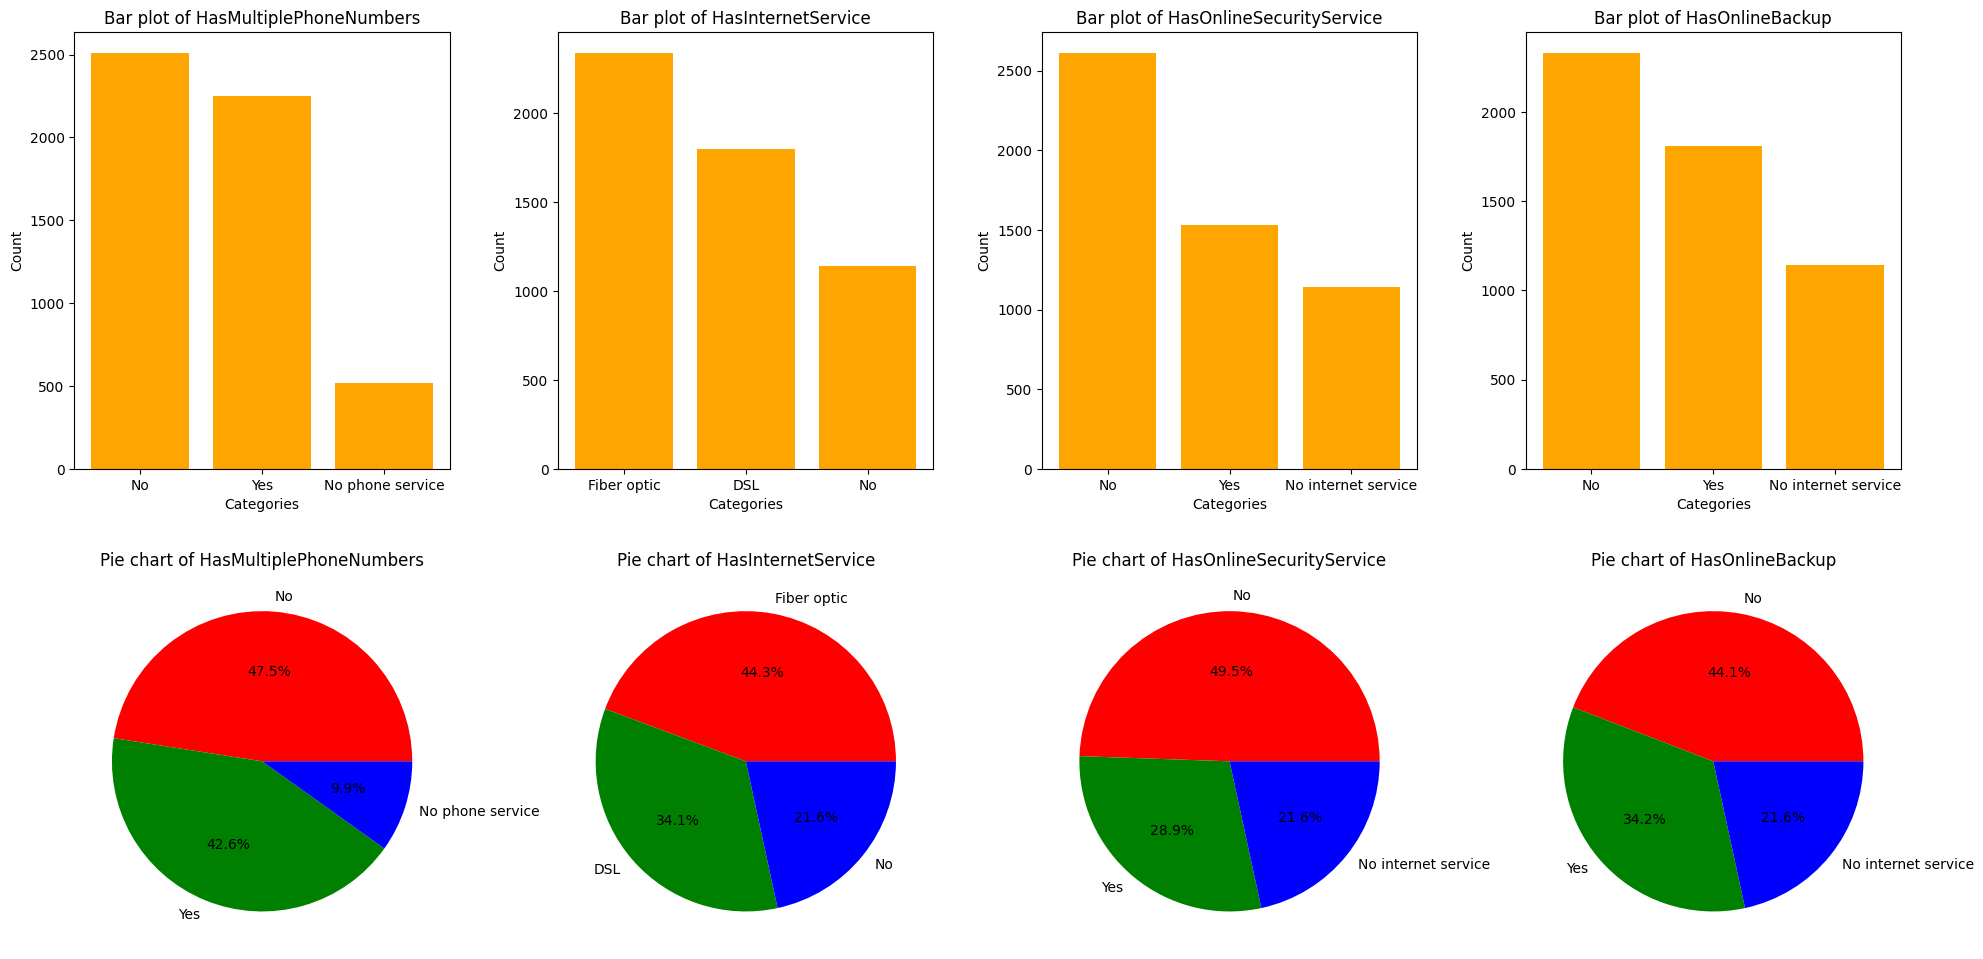

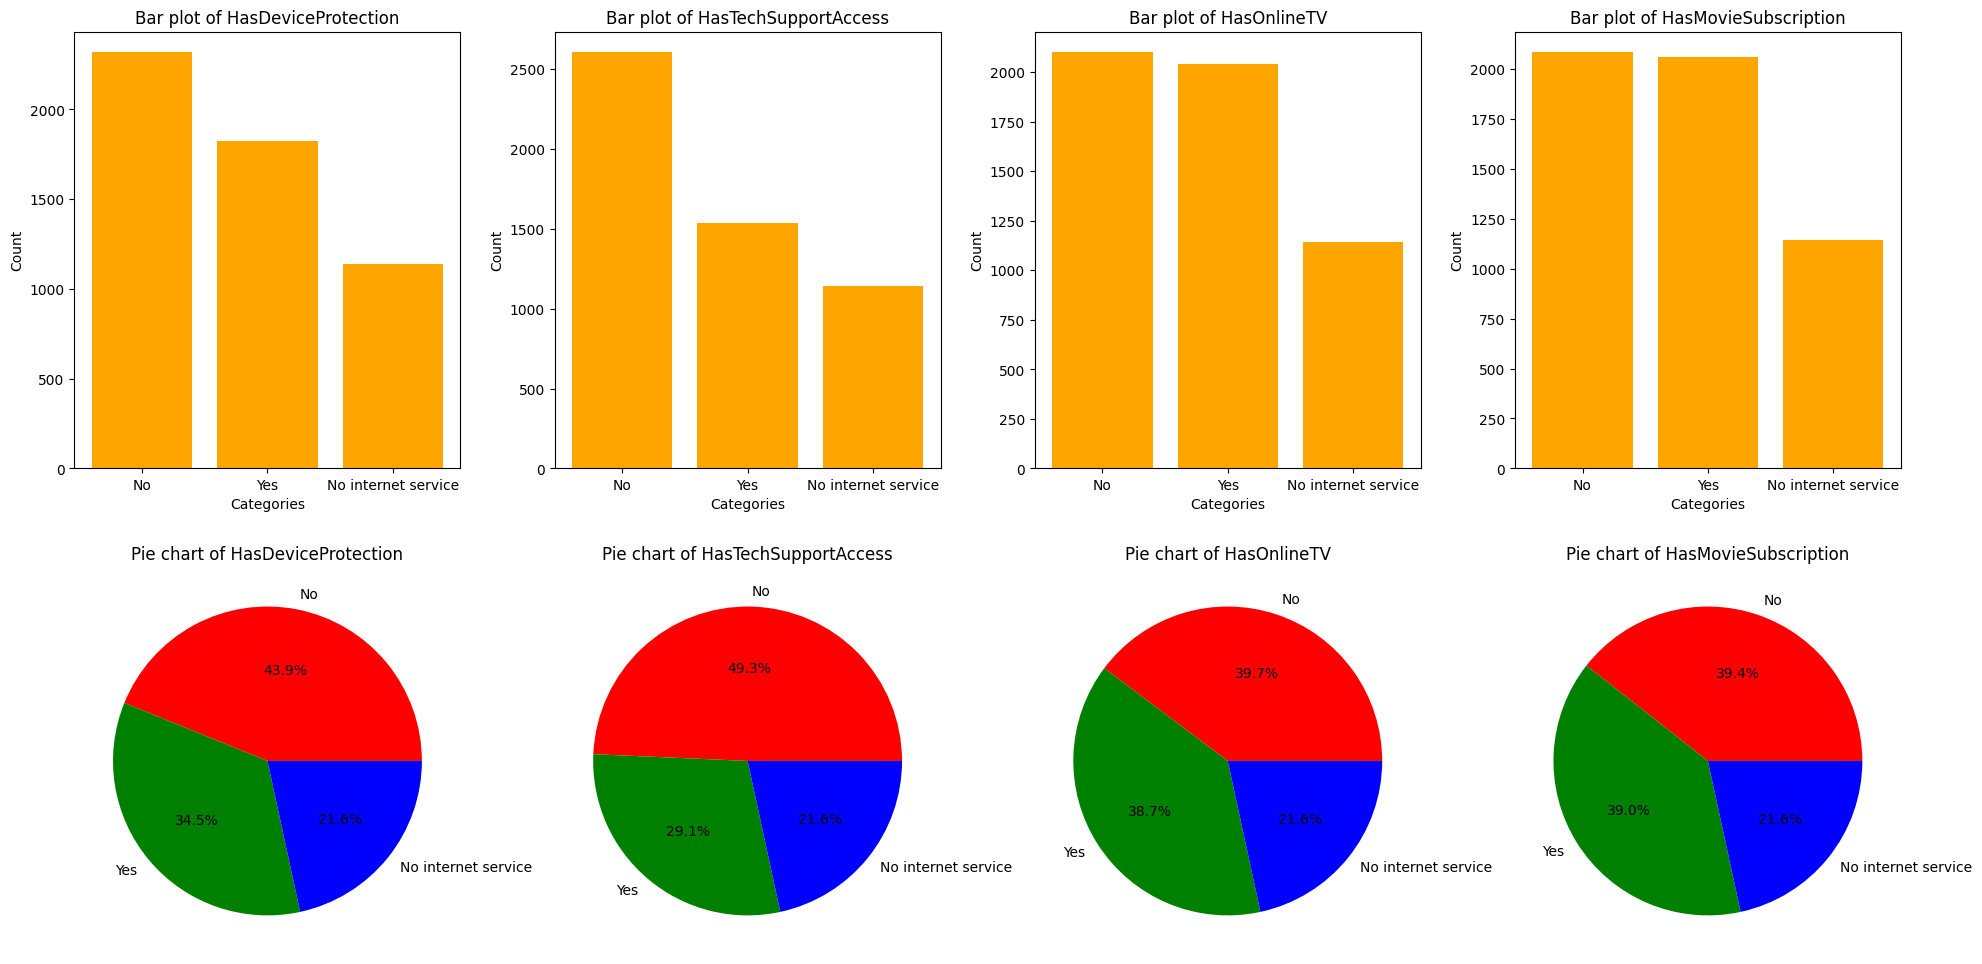

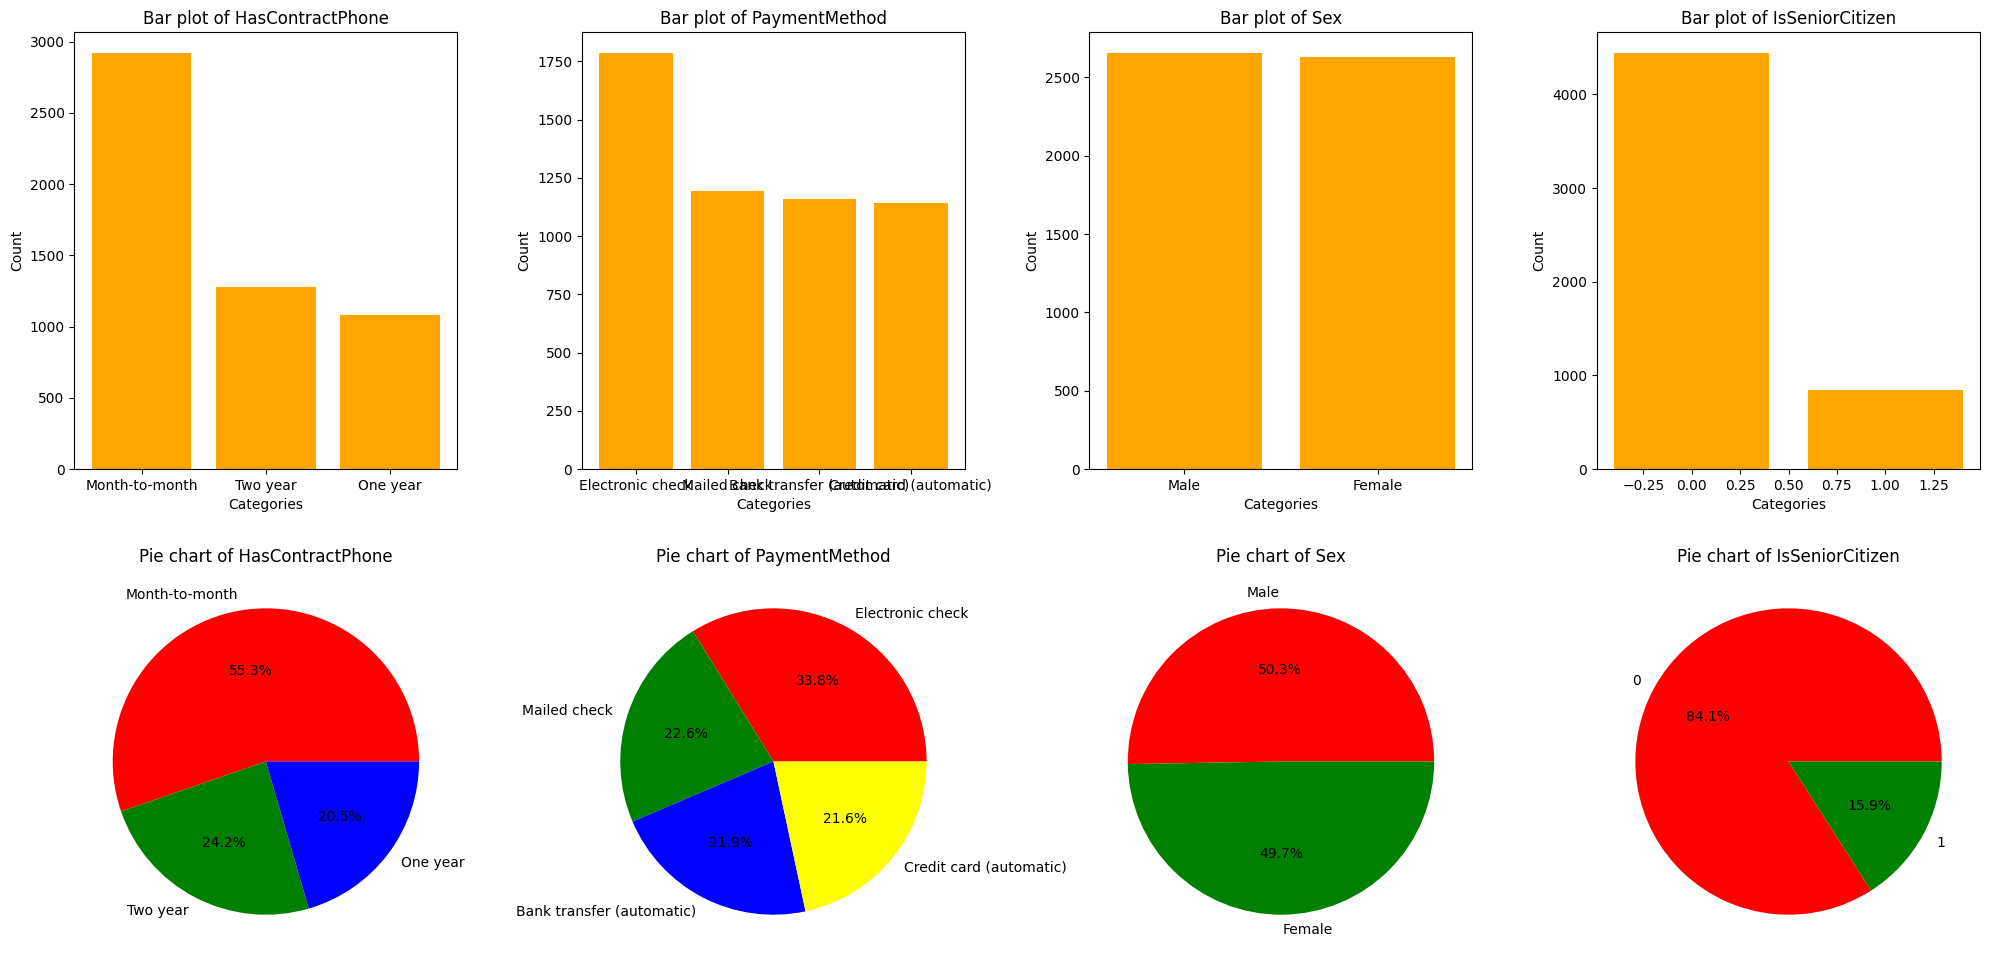

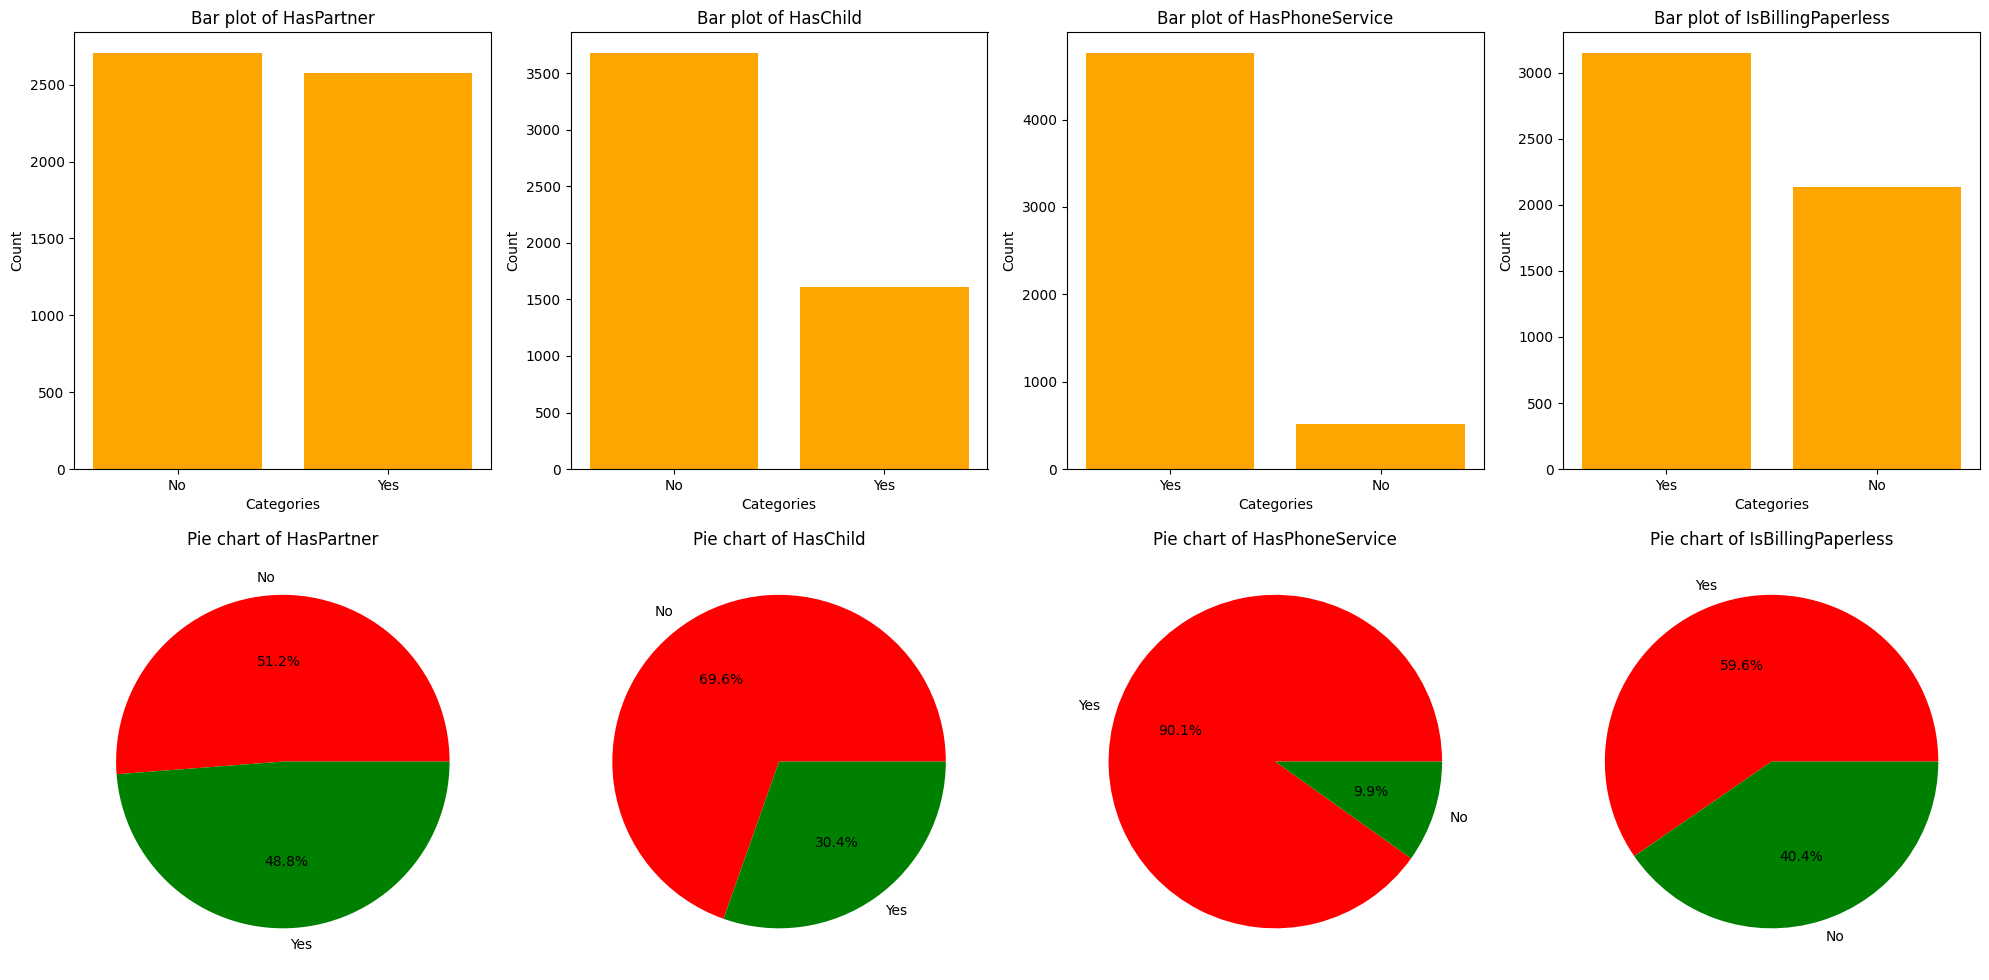

In [16]:
# следует запускать до кодировки категориальных признаков

import math

# Количество признаков на одном графике
features_per_plot = 4

cat_features = cat_cols + bin_cols

# Количество графиков
num_plots = math.ceil(len(cat_features) / features_per_plot)

for plot_num in range(num_plots):
    # Выбираем подмножество признаков
    start_idx = plot_num * features_per_plot
    end_idx = start_idx + features_per_plot
    subset_columns = cat_features[start_idx:end_idx]

    # Создаем фигуру и оси
    fig, axes = plt.subplots(2, len(subset_columns), figsize=(5 * len(subset_columns), 10))

    # Если только один признак, axes будет одномерным, исправляем это
    if len(subset_columns) == 1:
        axes = axes.reshape(-1, 1)

    # Перебираем категориальные признаки
    for i, col in enumerate(subset_columns):
        counts = cat_data[col].value_counts()

        # Bar-диаграмма
        axes[0, i].bar(counts.index, counts.values, color='orange')
        axes[0, i].set_title(f'Bar plot of {col}')
        axes[0, i].set_xlabel('Categories')
        axes[0, i].set_ylabel('Count')

        # Круговая диаграмма
        axes[1, i].pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue', 'yellow', 'purple'])
        axes[1, i].set_title(f'Pie chart of {col}')

    # Настраиваем layout и отображаем графики
    plt.tight_layout()
    plt.show()

Анализ распределения целевой переменной


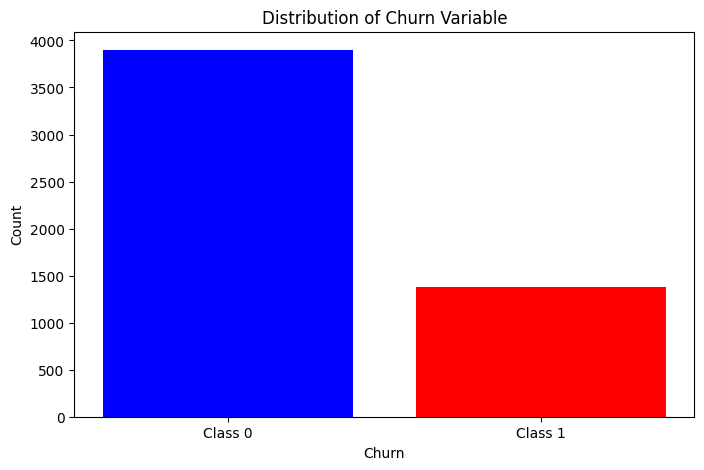

In [17]:
# Распределение целевой переменной
target_counts = data['Churn'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'])
plt.title('Distribution of Churn Variable')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

Проверка сбалансированности классов

In [18]:
# Проверка сбалансированности классов
if target_counts[0] == target_counts[1]:
    print("Классы сбалансированы.")
else:
    print("Классы несбалансированы.")
    imbalance_ratio = target_counts[0] / target_counts[1]
    print(f"Соотношение классов: {imbalance_ratio:.2f}")

Классы несбалансированы.
Соотношение классов: 2.82


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

Нормировка числовых признаков


In [10]:
# Инициализация StandardScaler
scaler = StandardScaler()

def num_scaler(data):
    # Применяем StandardScaler к выбранным столбцам
    data[num_cols] = scaler.fit_transform(data[num_cols])
    return data

data = num_scaler(data)
data_test = num_scaler(data_test)

*Кодировку категориальных признаков выполнил в предыдущем пункте!!!*

LogisticRegressionCV

In [12]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X, y = data.drop(columns=['Churn']), data['Churn']

# Указываем значения C для поиска
Cs = [100, 10, 1, 0.1, 0.01, 0.001]

# Создаем модель LogisticRegressionCV
model = LogisticRegressionCV(Cs=Cs, cv=5, scoring='roc_auc', random_state=42, refit=True, max_iter=1000)

# Обучаем модель на всех данных с кросс-валидацией
model.fit(X, y)

# Получаем результаты кросс-валидации
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

# Средний ROC-AUC по кросс-валидации
mean_roc_auc = np.mean(cv_scores)
print(f'Средний ROC-AUC по кросс-валидации: {mean_roc_auc}')

# Лучший параметр C
best_C = model.C_
print(f'Лучший параметр C: {best_C}')

# Коэффициенты модели (веса)
coefficients = model.coef_
print(f'Коэффициенты модели: {coefficients}')

# Свободный член (intercept)
intercept = model.intercept_
print(f'Свободный член: {intercept}')

Средний ROC-AUC по кросс-валидации: 0.8448008179412072
Лучший параметр C: [10.]
Коэффициенты модели: [[-1.43943284 -1.25269825  0.72876206 -0.0420199   0.28195782  0.01287915
  -0.16095179 -0.06372192  0.4066936  -0.28504435 -0.58646305  0.22132243
  -0.90826177  0.7750235  -0.5169467   0.08407218 -0.5169467  -0.21731045
  -0.06700346 -0.5169467  -0.06623481 -0.14154022 -0.5169467   0.00830195
   0.02690368 -0.5169467  -0.16014194 -0.34587289 -0.5169467   0.21263462
  -0.35129404 -0.5169467   0.21805577  0.46619851 -0.15712516 -0.95925832
  -0.20406099 -0.34482267  0.11489026 -0.21619158]]
Свободный член: [-0.68548368]


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Средний ROC-AUC по кросс-валидации: 0.8448008179412072 \
Лучший параметр C: [10.] \
Коэффициенты модели: [[-1.43943284 -1.25269825  0.72876206 -0.0420199   0.28195782  0.01287915 \
  -0.16095179 -0.06372192  0.4066936  -0.28504435 -0.58646305  0.22132243 \
  -0.90826177  0.7750235  -0.5169467   0.08407218 -0.5169467  -0.21731045 \
  -0.06700346 -0.5169467  -0.06623481 -0.14154022 -0.5169467   0.00830195 \
   0.02690368 -0.5169467  -0.16014194 -0.34587289 -0.5169467   0.21263462 \
  -0.35129404 -0.5169467   0.21805577  0.46619851 -0.15712516 -0.95925832 \
  -0.20406099 -0.34482267  0.11489026 -0.21619158]] \
Свободный член: [-0.68548368] 

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [11]:
from sklearn.model_selection import train_test_split

# Разделяем данные на признаки (X) и целевую переменную (y)
X = cat_data.drop(columns=['Churn'])
y = cat_data['Churn']

# Разделяем данные на train/valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


# Параметры для перебора
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Создаем модель CatBoost
model = CatBoostClassifier(cat_features=cat_cols+bin_cols, random_state=42, verbose=0)

# Используем GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

# Лучшие параметры и результат
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_
print(f'Лучшие параметры: {best_params}, Лучший ROC-AUC: {best_roc_auc}')

best_cat = grid_search.best_estimator_


Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 100}, Лучший ROC-AUC: 0.8514114908853744


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 100}, Лучший ROC-AUC: 0.8514114908853744


# Предсказания

In [13]:
best_model = best_cat

In [14]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(cat_data_test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

LogisticRegressionCV выдала 0.84

CatBoost выдал 0.852